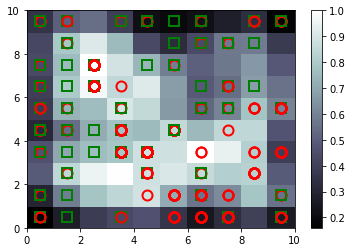

In [53]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom


som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

# Visualize the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T) 
colorbar() # add the legend
markers = ['o','s'] # marker type
colors = ['r', 'g'] # color the markers

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, 
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2
         )
show()

In [61]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2,7)], mappings[(6,3)]), axis=0)
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5739548e+07, 0.0000000e+00, 2.2670000e+01, 7.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5648069e+07, 0.0000000e+00, 2.4500000e+01, 1.7500000e+00,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.3200000e+02, 1.0000000e+00],
       [1.5783883e+07, 0.0000000e+00, 3.8920000e+01, 1.6650000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 2.5000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.9100000e+02],
       [1.5756538e+07, 0.0000000e+00, 3.9080000e+01, 4.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 3.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,